# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [182]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error # for checking performance
from flaml import AutoML

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [183]:
train_df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [184]:
# look at data statistics
train_df.shape

(8763, 49)

In [185]:
train_df.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [186]:
#check data frame for data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [187]:
#checking for null values in each columns
train_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [188]:
#getting numerical features
numerical_features = [col for col in train_df if train_df[col].dtype =='float']

In [189]:
#get summary statistics for our Data
train_df[numerical_features].describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [190]:
#check data skewness for numerical features
skewness = train_df[numerical_features].skew()

## check for presence of outliers for numerical features
outliers = train_df[numerical_features].kurtosis()

In [191]:
#features with high outlisers
highly_skewed_features = [features for features in skewness.index
                          if skewness[features] <-1.0 or skewness[features]> 1.0]
highly_Outlier_features = [features for features in outliers.index
                           if outliers[features] >3]

In [192]:
#highly skewed features
print('Highly Skewed features\n',skewness[highly_skewed_features])
print('\nfeatures with extreme outliers\n',outliers[highly_Outlier_features])

Highly Skewed features
 Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Barcelona_wind_speed     1.057331
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Madrid_pressure         -1.850768
Bilbao_weather_id       -1.234844
dtype: float64

features with extreme outliers
 Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Bilbao_wind_speed          3.631565
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746


## Comment
We can see that there are 22  fetaures which are highly skewed and 14 with high outliers.

Below we replace values with high outliers with the Median

In [193]:
## replace extreme outliers with the median
for col in highly_Outlier_features:
    new_list = []
    median = train_df[col].median()
    std = train_df[col].std()
    for row in train_df[col]:
        if abs(row-median) > std:
            new_list.append(median)
        else:
            new_list.append(row)
    train_df[col] = new_list

In [194]:
#check again for outliers
outliers = train_df[numerical_features].kurtosis()
highly_Outlier_features = [features for features in outliers.index
                           if outliers[features] >3]
print('\nfeatures with extreme outliers\n',outliers[highly_Outlier_features])


features with extreme outliers
 Barcelona_rain_1h        17.510665
Seville_rain_1h          35.243550
Bilbao_snow_3h          784.979181
Barcelona_pressure      460.920549
Seville_rain_3h         453.539522
Madrid_rain_1h           31.118072
Barcelona_rain_3h       265.042494
Madrid_weather_id        62.516957
Barcelona_weather_id    106.696024
Seville_weather_id       20.462529
dtype: float64


## Comment
We have attempted to remove outliers, but the above features still have high outliers, we may contemplate removing them in the later steps

<Axes: >

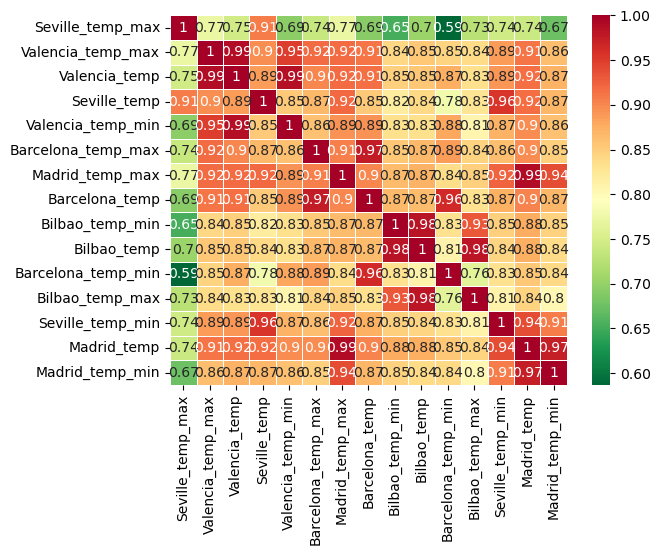

In [195]:
#plot interactions between all temperature features
temp_features = [feature for feature in train_df if 'temp' in feature]
corr = train_df[temp_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

<Axes: >

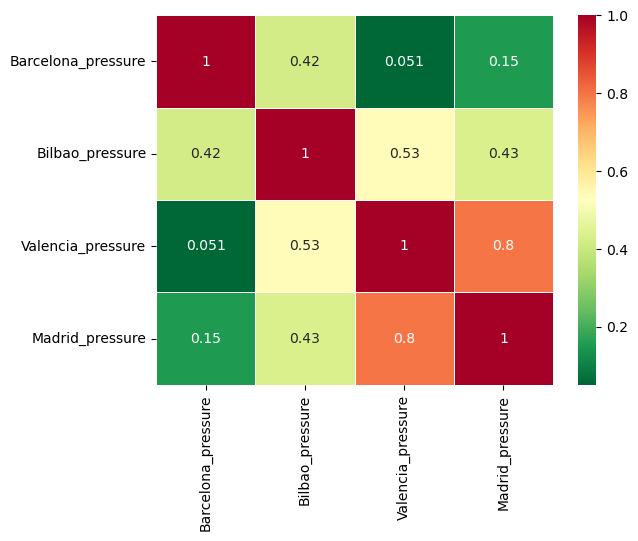

In [196]:
#plot interactions between all pressure features
pressure_features = [feature for feature in numerical_features if 'pressure' in feature]
corr = train_df[pressure_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

<Axes: >

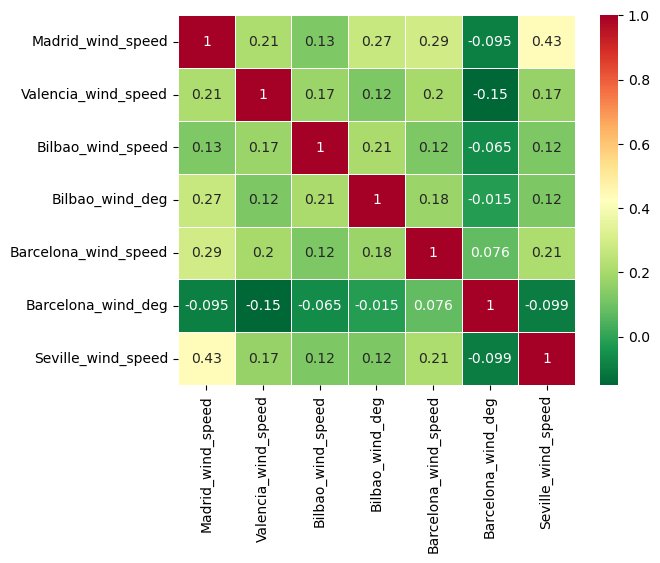

In [197]:
#plot interactions between all wind features
wind_features = [feature for feature in numerical_features if 'wind' in feature]
corr = train_df[wind_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

<Axes: >

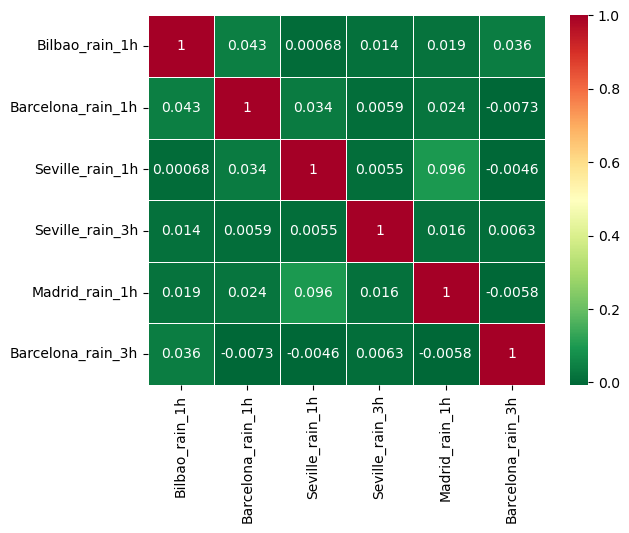

In [198]:
#plot interactions between all rain features
rain_features = [feature for feature in numerical_features if 'rain' in feature]
corr = train_df[rain_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

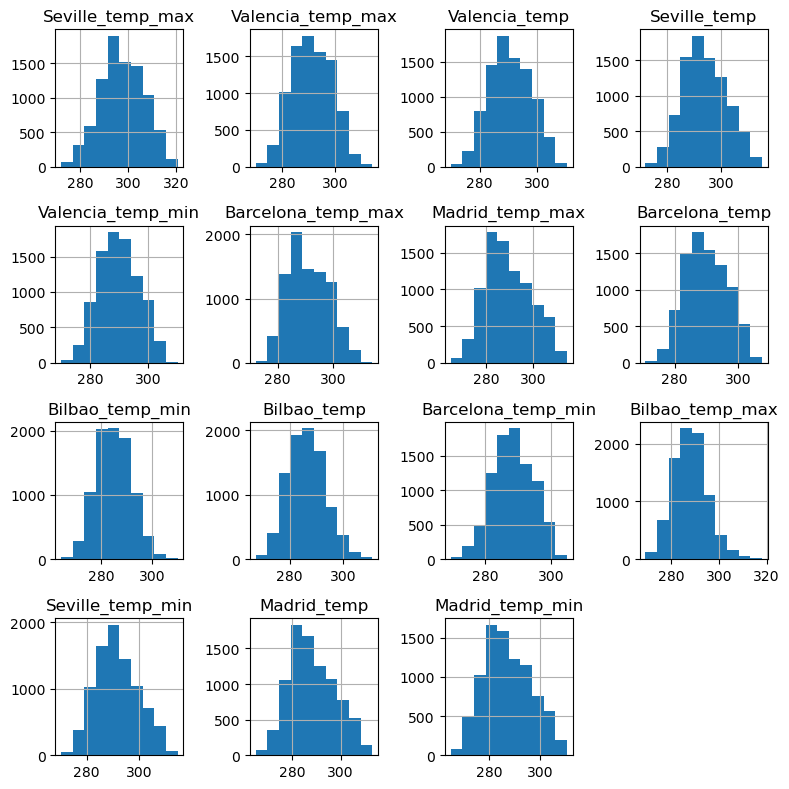

In [199]:
# plotting temp feature distributions
train_df[temp_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

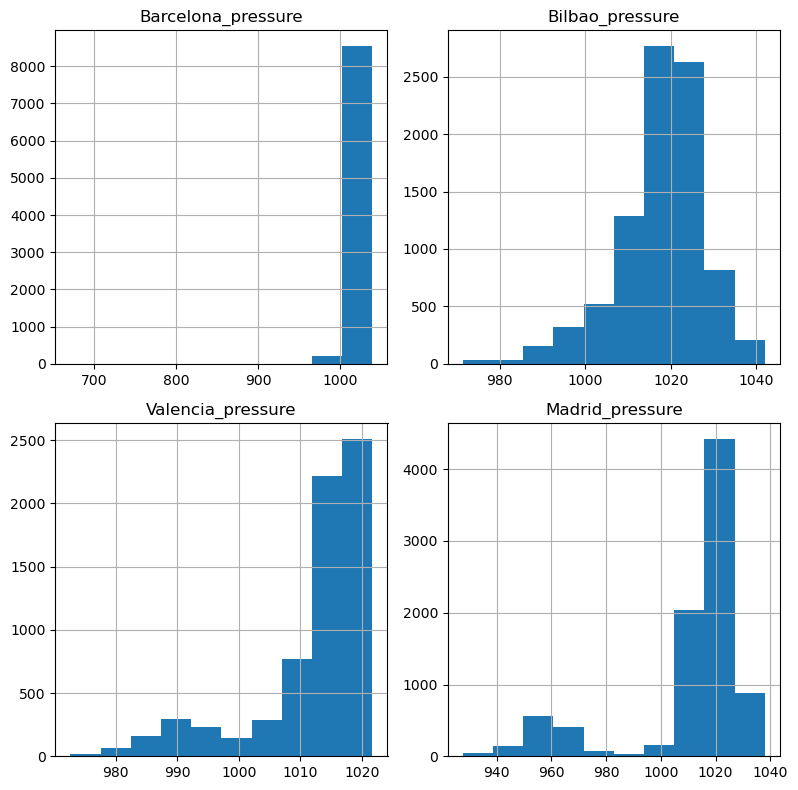

In [210]:
# plotting pressure feature distributions
train_df[pressure_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

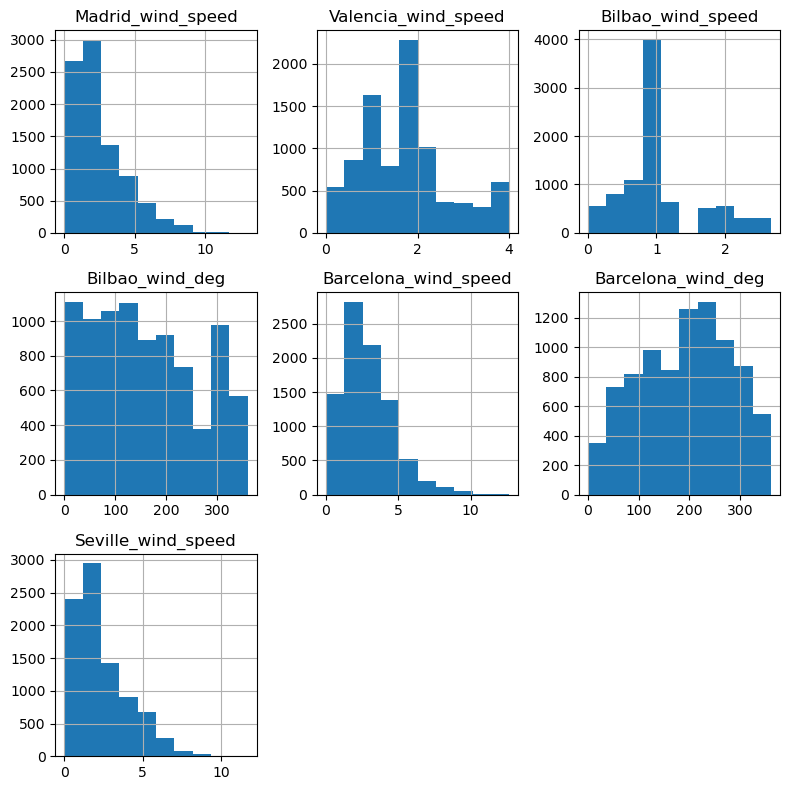

In [211]:
# plotting wind feature distributions
train_df[wind_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

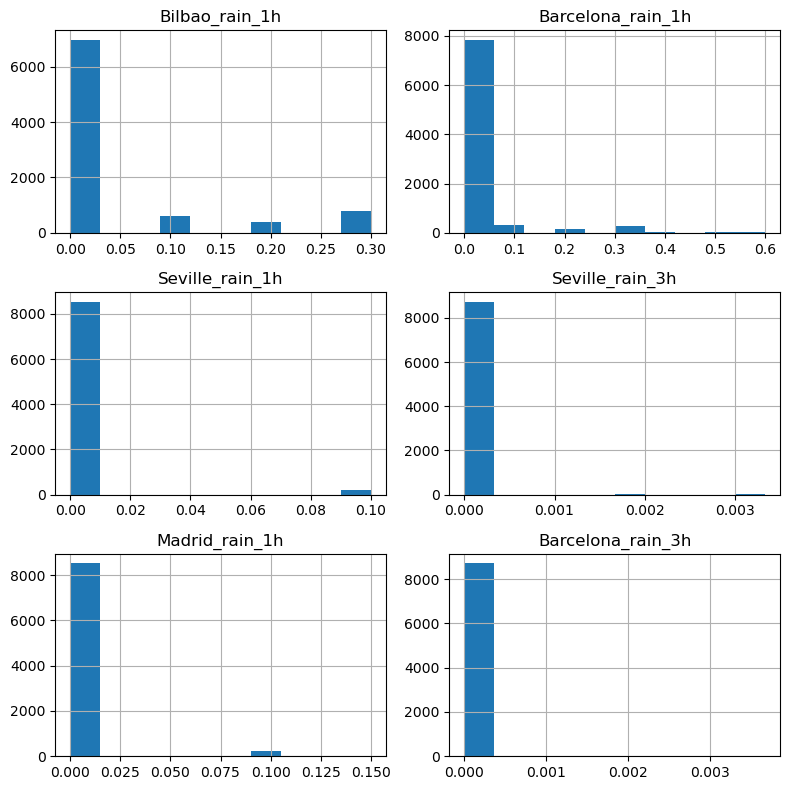

In [212]:
# plotting rain feature distributions
train_df[rain_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

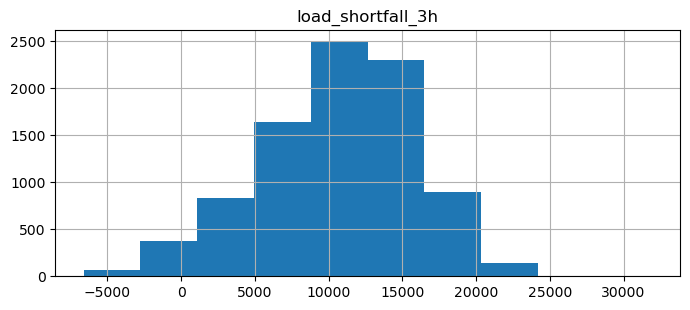

In [213]:
#plot distribution for the target VAR
train_df['load_shortfall_3h'].hist(figsize=(7,3))
plt.tight_layout()
plt.title('load_shortfall_3h')
plt.show()

In [214]:
#yearly time series data
fig = px.line(train_df, x='time', y='load_shortfall_3h',title='Time Series view')
fig.show()

In [215]:
# check for variance for all numerical fetures
train_df[numerical_features].var().sort_values(ascending=True)

Valencia_snow_3h        0.000000e+00
Seville_rain_3h         1.982938e-08
Barcelona_rain_3h       3.166502e-08
Bilbao_snow_3h          2.226687e-04
Seville_rain_1h         2.426121e-04
Madrid_rain_1h          2.756652e-04
Barcelona_rain_1h       7.472117e-03
Bilbao_rain_1h          8.766845e-03
Bilbao_wind_speed       3.739447e-01
Valencia_wind_speed     8.857624e-01
Seville_wind_speed      2.798577e+00
Barcelona_wind_speed    3.211971e+00
Madrid_wind_speed       3.423872e+00
Barcelona_weather_id    3.246801e+01
Barcelona_temp_min      3.724164e+01
Barcelona_temp          4.261624e+01
Bilbao_temp_min         4.496603e+01
Bilbao_temp             4.649443e+01
Valencia_temp_min       4.771220e+01
Bilbao_temp_max         5.048941e+01
Valencia_temp           5.129816e+01
Barcelona_temp_max      5.290435e+01
Madrid_weather_id       5.317765e+01
Valencia_temp_max       5.723970e+01
Seville_temp            6.274203e+01
Seville_temp_min        6.688329e+01
Seville_temp_max        7.878004e+01
M

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [216]:
# remove missing values/ features
#columns such as those that contain 'id' contain no usefull information\

def drop_cols(data):
    #drop all id cols
    data = data.drop([col for col in data if 'id' in col], axis ='columns')

    #drop the unnamed col in both 
    data = data.drop(['Unnamed: 0'],axis=1)

    #drop cols with large missing values
    data = data.drop(['Seville_pressure','Valencia_wind_deg'],axis='columns')
    
    return data
    

train_df = drop_cols(train_df)
test_df = drop_cols(test_df)
    

In [217]:
# create new features

#Will average all pressure fetures into a single feature and drop the rest.
def new_features(data):
    
    #code the time col
    time =  pd.to_datetime(data['time'])
    data['time'] = time

    data['Day'] = data['time'].dt.day
    data['month'] = data['time'].dt.month
    data['hour'] = data['time'].dt.hour

    
    similar_list = ['temp','pressure','rain','wind','snow','cloud']
    
    for se in similar_list:
        temp_features = [col for col in data.columns.tolist() if se in col]
        data['av_spain_'+se] = data[temp_features].mean(axis=1)
        data = data.drop(temp_features, axis='columns')
    
    #drop time col
    data = data.drop(['time'],axis='columns')

    return data
        
train_df = new_features(train_df)
test_df = new_features(test_df)



In [218]:
#drop the time col
labels = train_df['load_shortfall_3h']
features = train_df.drop(['load_shortfall_3h'],axis='columns')


In [219]:
# create scaler object

def scale_data(data):
    
    scaler = StandardScaler()
    cols = data.columns.tolist()
    
    #scale data
    X_scaled = scaler.fit_transform(data)

    X_standardise = pd.DataFrame(X_scaled,columns=cols)

    #after normalizing, we can fill nan with zero
    X_standardise.fillna(0)
    
    return X_standardise

features = scale_data(features)
test_df = scale_data(test_df)

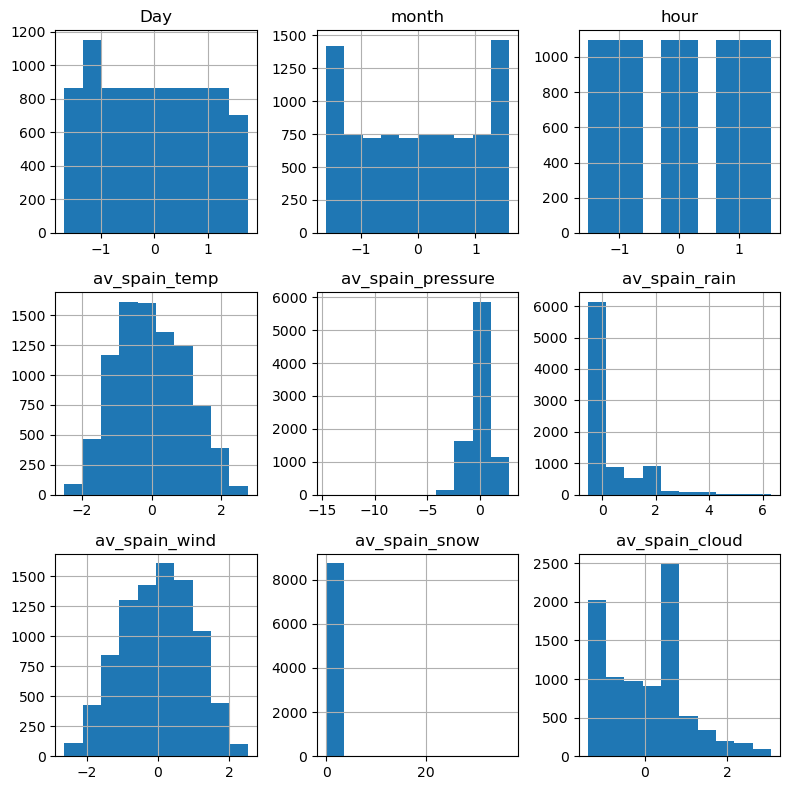

In [220]:
#New Features Distribution
# plotting new feature distributions
features.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [221]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features[final_features], labels, test_size=0.2, random_state=50)

In [222]:
# create targets and features dataset


In [229]:
# create one or more ML models

#simple linear model
lm = LinearRegression()
#lm.fit(X_train['Day'],y_train) #will fit a simple linear model on Day of the month 

#multiple linear model
lm2 = LinearRegression()
lm2.fit(X_train,y_train) #fit a multiple linear model on all the features and targets

#Ridge regression
rg = Ridge()
rg.fit(X_train, y_train)

#LASSO model
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)

#Decision Tree
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train, y_train.values.ravel())

#support vector machine
sv = sv_reg = SVR(kernel='rbf', gamma='auto')
sv.fit(X_train, y_train.values.ravel())

#random forest
rf = RandomForestRegressor(n_estimators=80, max_depth=8)
rf.fit(X_train, y_train.values.ravel())

#ensemble method
models = [("ls",ls),("SVR",sv),("rf",rf)]

#fit AutoML
#automl = AutoML()
#automl.fit(X_train, y_train)

# weights for weighted model averaging
model_weightings = np.array([0.1,0.1,0.8])
voting_reg = VotingRegressor(estimators=models,weights=model_weightings)
voting_reg.fit(X_train,y_train.values.ravel())


VotingRegressor(estimators=[('ls', Lasso(alpha=0.01)),
                            ('SVR', SVR(gamma='auto')),
                            ('rf',
                             RandomForestRegressor(max_depth=8,
                                                   n_estimators=80))],
                weights=array([0.1, 0.1, 0.8]))

In [230]:
# evaluate one or more ML models
# Evaluate multiple linear morel performance
lm2_pred = lm2.predict(X_test)

# Evaluate Ridge Model performance
rg_pred = dt.predict(X_test)

# Evaluate LASSO Model performance
ls_pred = ls.predict(X_test)

# Evaluate Decision Tree model performance
dt_pred = dt.predict(X_test)

# Evaluate support vector performance
sv_pred = sv.predict(X_test)

# Evaluate Support Vector performance
rf_pred = rf.predict(X_test)

# Evaluate Ensemble performance
emb_pred = voting_reg.predict(X_test)

# Evaluate AutoML performance
#at_pred = automl.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [231]:
# Compare model performance
model_performance = {
    'lm': np.sqrt(mean_squared_error(y_test,lm2_pred)),
    'RG': np.sqrt(mean_squared_error(y_test,rg_pred)),
    'ls': np.sqrt(mean_squared_error(y_test,ls_pred)),
    'DT': np.sqrt(mean_squared_error(y_test,dt_pred)),
    'SV': np.sqrt(mean_squared_error(y_test,sv_pred)),
    'RF': np.sqrt(mean_squared_error(y_test,rf_pred)),
    'EMB':np.sqrt(mean_squared_error(y_test,emb_pred))
}
model_performance

{'lm': 5011.818623131032,
 'RG': 4294.58589917415,
 'ls': 5011.819610878846,
 'DT': 4294.58589917415,
 'SV': 5322.692734120636,
 'RF': 3905.5521678427262,
 'EMB': 3990.5904141355754}

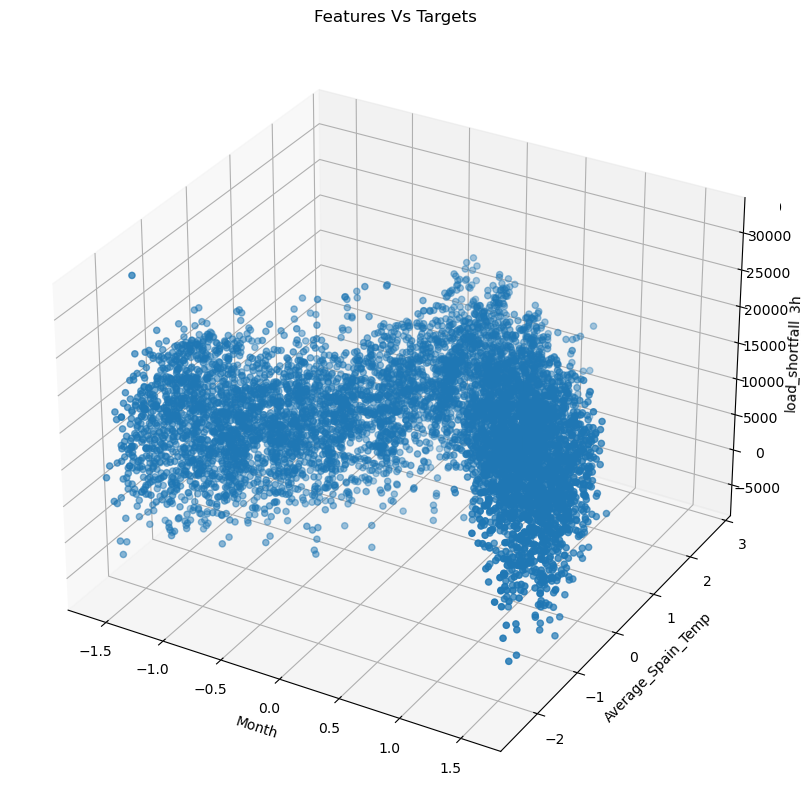

In [226]:
#check model performance
# plot the voting regression prediction line over data
# Plot the linear regression prediction line over data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train['month'], X_train['av_spain_temp'], y_train)
ax.set_title('Features Vs Targets')
ax.set_xlabel('Month')
ax.set_ylabel('Average_Spain_Temp')
ax.set_zlabel('load_shortfall_3h')
plt.show()



In [227]:
#storing our model
model_save_path = "C:/Users/ms5846/OneDrive - Sandvik/HomeShare/Documents/Advanced-Regression-Starter-Data/MODEL/mlr_model3.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_pred,file)

In [228]:
# Choose best model and motivate why it is the best choice

#the best model so far is the Random forect model. Used below to predict the test set.
rf_pred = rf.predict(test_df[final_features])
test_df = pd.read_csv('df_test.csv')
df = test_df[['time']]
df['load_shortfall_3h'] = rf_pred
df.to_csv('submission.csv',index=False)

C:\Users\ms5846\AppData\Local\Temp\ipykernel_34844\3879902417.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

#